In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Code reference for this notebook:
https://github.com/linyue-zz/Unpacking-the-Nuances-of-Londons-Neighbourhood-Change-Gentrification-Trajectories-codes/blob/master/5a%20Clustering%20Ascending%20LSOAs.ipynb

## Differentiate Typologies of Ascending MSOAs

### Proxy Variables for Part Two

In [2]:
pca_results = pd.read_csv('output/pca_score_analysis.csv')

In [3]:
pca_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1211 entries, 0 to 1210
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   MSOA11CD                     1211 non-null   object 
 1   ratio_la_median_price_2001   1211 non-null   float64
 2   ratio_la_median_price_2011   1211 non-null   float64
 3   ratio_la_earnings_2001       1211 non-null   float64
 4   ratio_la_earnings_2011       1211 non-null   float64
 5   ratio_la_nssec_2001          1211 non-null   float64
 6   ratio_la_nssec_2011          1211 non-null   float64
 7   ratio_la_qualification_2001  1211 non-null   float64
 8   ratio_la_qualification_2011  1211 non-null   float64
 9   Score_2001                   1211 non-null   float64
 10  Score_2011                   1211 non-null   float64
 11  MSOA11NM                     1211 non-null   object 
 12  LAD11CD                      1211 non-null   object 
 13  LAD11NM           

In [4]:
# extract only ascending LSOAs

asc = pca_results[pca_results["status2"] == "ASC"]
asc_id = asc.drop(asc.columns[1:23],axis=1)

In [5]:
asc_id.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 1 to 1209
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   MSOA11CD  177 non-null    object
 1   status2   177 non-null    object
dtypes: object(2)
memory usage: 4.1+ KB


In [6]:
swandlondon_core = pd.read_csv('output/swandlondon_core.csv')

In [7]:
swandlondon_core.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1211 entries, 0 to 1210
Data columns (total 45 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   MSOA11CD                             1211 non-null   object 
 1   MSOA11NM                             1211 non-null   object 
 2   LAD11CD                              1211 non-null   object 
 3   LAD11NM                              1211 non-null   object 
 4   RGN11CD                              1211 non-null   object 
 5   RGN11NM                              1211 non-null   object 
 6   MSOA01CD                             1211 non-null   object 
 7   MSOA01NM                             1211 non-null   object 
 8   CHGIND                               1211 non-null   object 
 9   ratio_la_median_price_2001           1211 non-null   float64
 10  ratio_la_median_price_2011           1211 non-null   float64
 11  ratio_r_median_price_2001     

In [8]:
for name in ['median_price','earnings','nssec','qualification','no_children', 'dependent_children','nondependent_children', 'retired', 'student','owned', 'rented','migrants']:
    for ind, row in swandlondon_core.iterrows():
        swandlondon_core.loc[ind,'chg_ratio_la_'+name] = row['ratio_la_' +name+'_2011']-row['ratio_la_' +name+'_2001']
        
        
#code reference: https://www.youtube.com/watch?v=nH1gw-slnOo

In [9]:
swandlondon_core.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1211 entries, 0 to 1210
Data columns (total 57 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   MSOA11CD                             1211 non-null   object 
 1   MSOA11NM                             1211 non-null   object 
 2   LAD11CD                              1211 non-null   object 
 3   LAD11NM                              1211 non-null   object 
 4   RGN11CD                              1211 non-null   object 
 5   RGN11NM                              1211 non-null   object 
 6   MSOA01CD                             1211 non-null   object 
 7   MSOA01NM                             1211 non-null   object 
 8   CHGIND                               1211 non-null   object 
 9   ratio_la_median_price_2001           1211 non-null   float64
 10  ratio_la_median_price_2011           1211 non-null   float64
 11  ratio_r_median_price_2001     

In [10]:
swandlondon_extract3=list(swandlondon_core.iloc[:,[0,49,50,51,52,54,55,56]].columns)
swandlondon_cluster=swandlondon_core[swandlondon_extract3].copy()

In [11]:
swandlondon_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1211 entries, 0 to 1210
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   MSOA11CD                            1211 non-null   object 
 1   chg_ratio_la_no_children            1211 non-null   float64
 2   chg_ratio_la_dependent_children     1211 non-null   float64
 3   chg_ratio_la_nondependent_children  1211 non-null   float64
 4   chg_ratio_la_retired                1211 non-null   float64
 5   chg_ratio_la_owned                  1211 non-null   float64
 6   chg_ratio_la_rented                 1211 non-null   float64
 7   chg_ratio_la_migrants               1211 non-null   float64
dtypes: float64(7), object(1)
memory usage: 75.8+ KB


In [12]:
asc_cluster = asc_id.merge(swandlondon_cluster, on = "MSOA11CD", how = "left")

In [13]:
asc_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 0 to 176
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   MSOA11CD                            177 non-null    object 
 1   status2                             177 non-null    object 
 2   chg_ratio_la_no_children            177 non-null    float64
 3   chg_ratio_la_dependent_children     177 non-null    float64
 4   chg_ratio_la_nondependent_children  177 non-null    float64
 5   chg_ratio_la_retired                177 non-null    float64
 6   chg_ratio_la_owned                  177 non-null    float64
 7   chg_ratio_la_rented                 177 non-null    float64
 8   chg_ratio_la_migrants               177 non-null    float64
dtypes: float64(7), object(2)
memory usage: 13.8+ KB


In [14]:
asc_cluster=asc_cluster.drop(columns=["status2"]).set_index("MSOA11CD")

In [15]:
asc_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177 entries, E02003123 to E02006927
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   chg_ratio_la_no_children            177 non-null    float64
 1   chg_ratio_la_dependent_children     177 non-null    float64
 2   chg_ratio_la_nondependent_children  177 non-null    float64
 3   chg_ratio_la_retired                177 non-null    float64
 4   chg_ratio_la_owned                  177 non-null    float64
 5   chg_ratio_la_rented                 177 non-null    float64
 6   chg_ratio_la_migrants               177 non-null    float64
dtypes: float64(7)
memory usage: 11.1+ KB


[Text(0, 0, 'chg_ratio_la_no_children'),
 Text(1, 0, 'chg_ratio_la_dependent_children'),
 Text(2, 0, 'chg_ratio_la_nondependent_children'),
 Text(3, 0, 'chg_ratio_la_retired'),
 Text(4, 0, 'chg_ratio_la_owned'),
 Text(5, 0, 'chg_ratio_la_rented'),
 Text(6, 0, 'chg_ratio_la_migrants')]

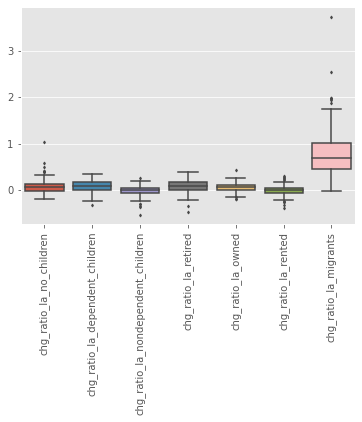

In [16]:
#boxplot of the variables
ax = sns.boxplot( data=asc_cluster,fliersize=2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
#plt.savefig('plot/p2-raw-box.png',dpi = 200,bbox_inches = 'tight')

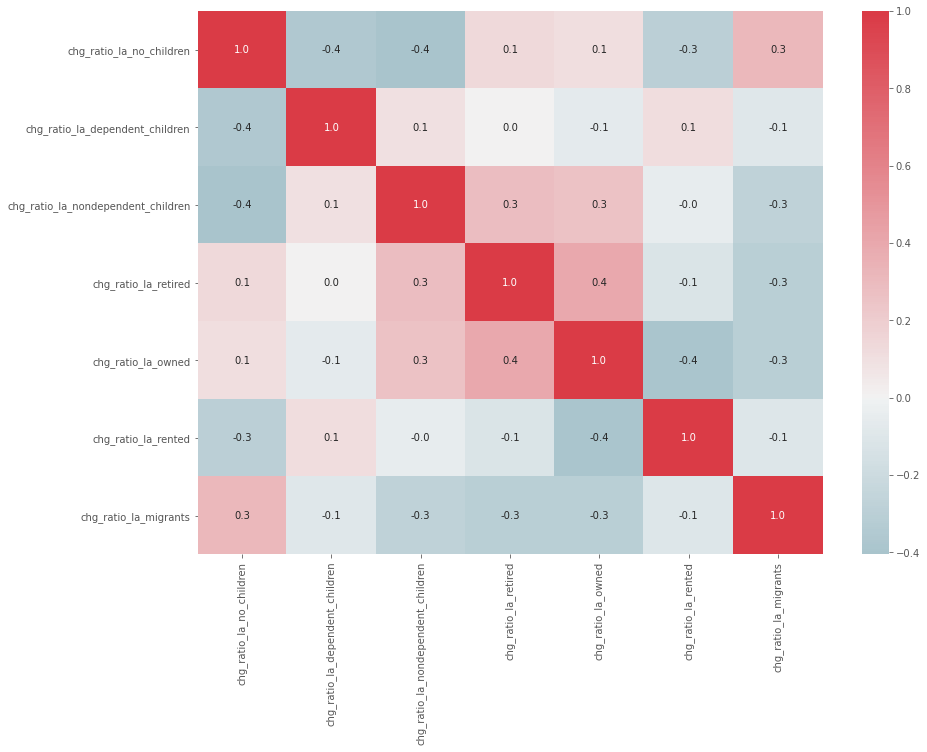

In [17]:
# check for multi-collinearity between variables

fig, ax = plt.subplots()
fig.set_size_inches(14, 10)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

ax=sns.heatmap(asc_cluster.corr(), cmap=cmap, center=0, annot=True, fmt=".1f")
#plt.savefig('plot/p2-raw-heat.png',dpi = 200,bbox_inches = 'tight')

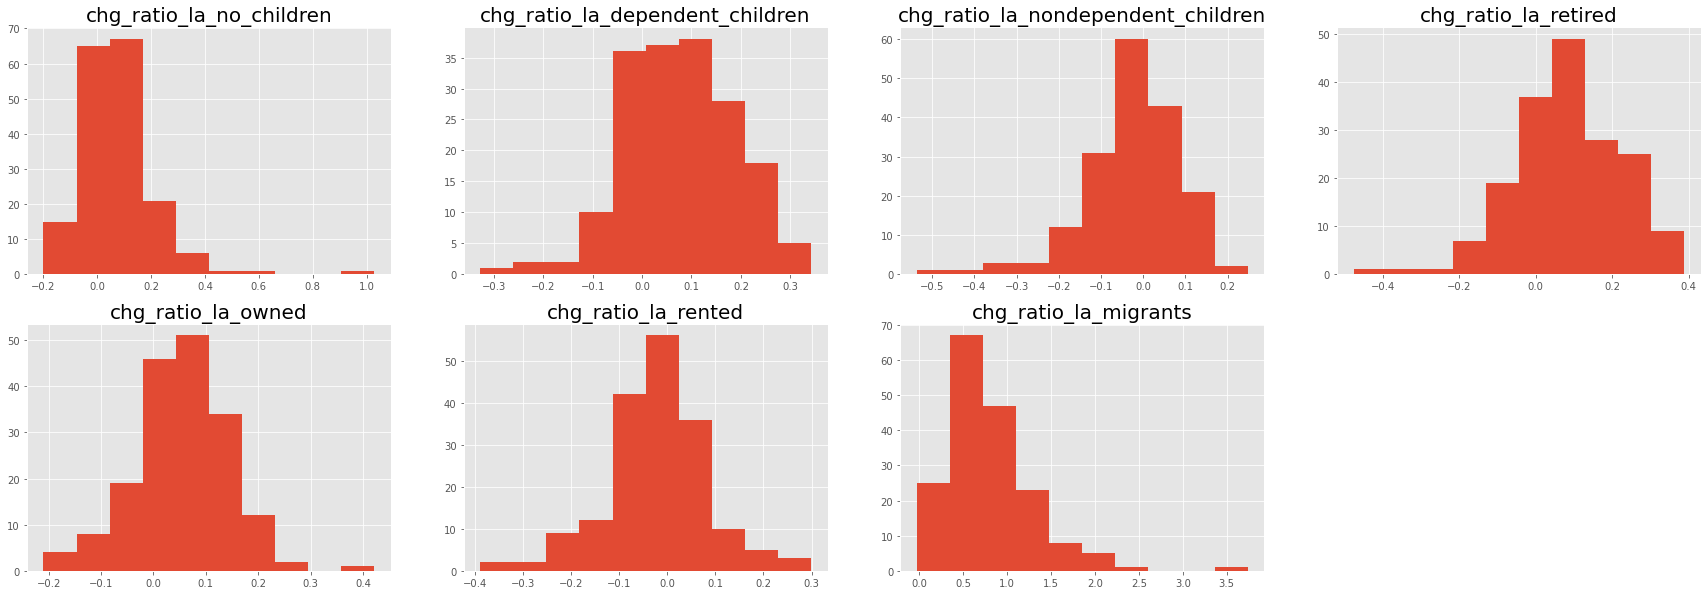

In [18]:
# plot histogram to view underlying distributions

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(30, 10))

counter = 0
for i in range(2):
    for j in range(4):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(asc_cluster.columns):

            ax.hist(asc_cluster[asc_cluster.columns[counter]], label='{}'.format(asc_cluster.columns[counter]))
            ax.set_title(asc_cluster.columns[counter], fontsize=20)

        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1
        
#plt.savefig('plot/p2-raw-his.png',dpi = 200,bbox_inches = 'tight')        
plt.show()
        


In [19]:
# check for heavily-skewed variables (i.e. skewness scores beyond +/- 1)

asc_cluster.skew (axis = 0)


chg_ratio_la_no_children              2.223149
chg_ratio_la_dependent_children      -0.237376
chg_ratio_la_nondependent_children   -1.046851
chg_ratio_la_retired                 -0.424868
chg_ratio_la_owned                    0.070737
chg_ratio_la_rented                  -0.204571
chg_ratio_la_migrants                 1.755261
dtype: float64

### Data transformation to deal with skewness

#### Cube root transformation

In [20]:
# applying cube root transformation to data variables

cluster_1_cubeRoot = np.cbrt(asc_cluster)
cluster_1_cubeRoot.head()

,chg_ratio_la_no_children,chg_ratio_la_dependent_children,chg_ratio_la_nondependent_children,chg_ratio_la_retired,chg_ratio_la_owned,chg_ratio_la_rented,chg_ratio_la_migrants
MSOA11CD,,,,,,,
E02003123,-0.487100,0.279067,0.361534,0.383319,0.401067,-0.520197,1.012883
E02003125,0.280502,0.399273,0.374720,0.508252,0.396603,-0.555082,0.937030
E02003130,-0.335035,0.318573,0.496950,0.407638,0.262429,-0.403513,0.789342
E02003142,0.405632,0.338248,0.526100,0.365252,0.261851,-0.307775,0.991843
E02003147,0.254408,0.630200,0.459968,0.262340,0.332100,-0.730247,1.235514


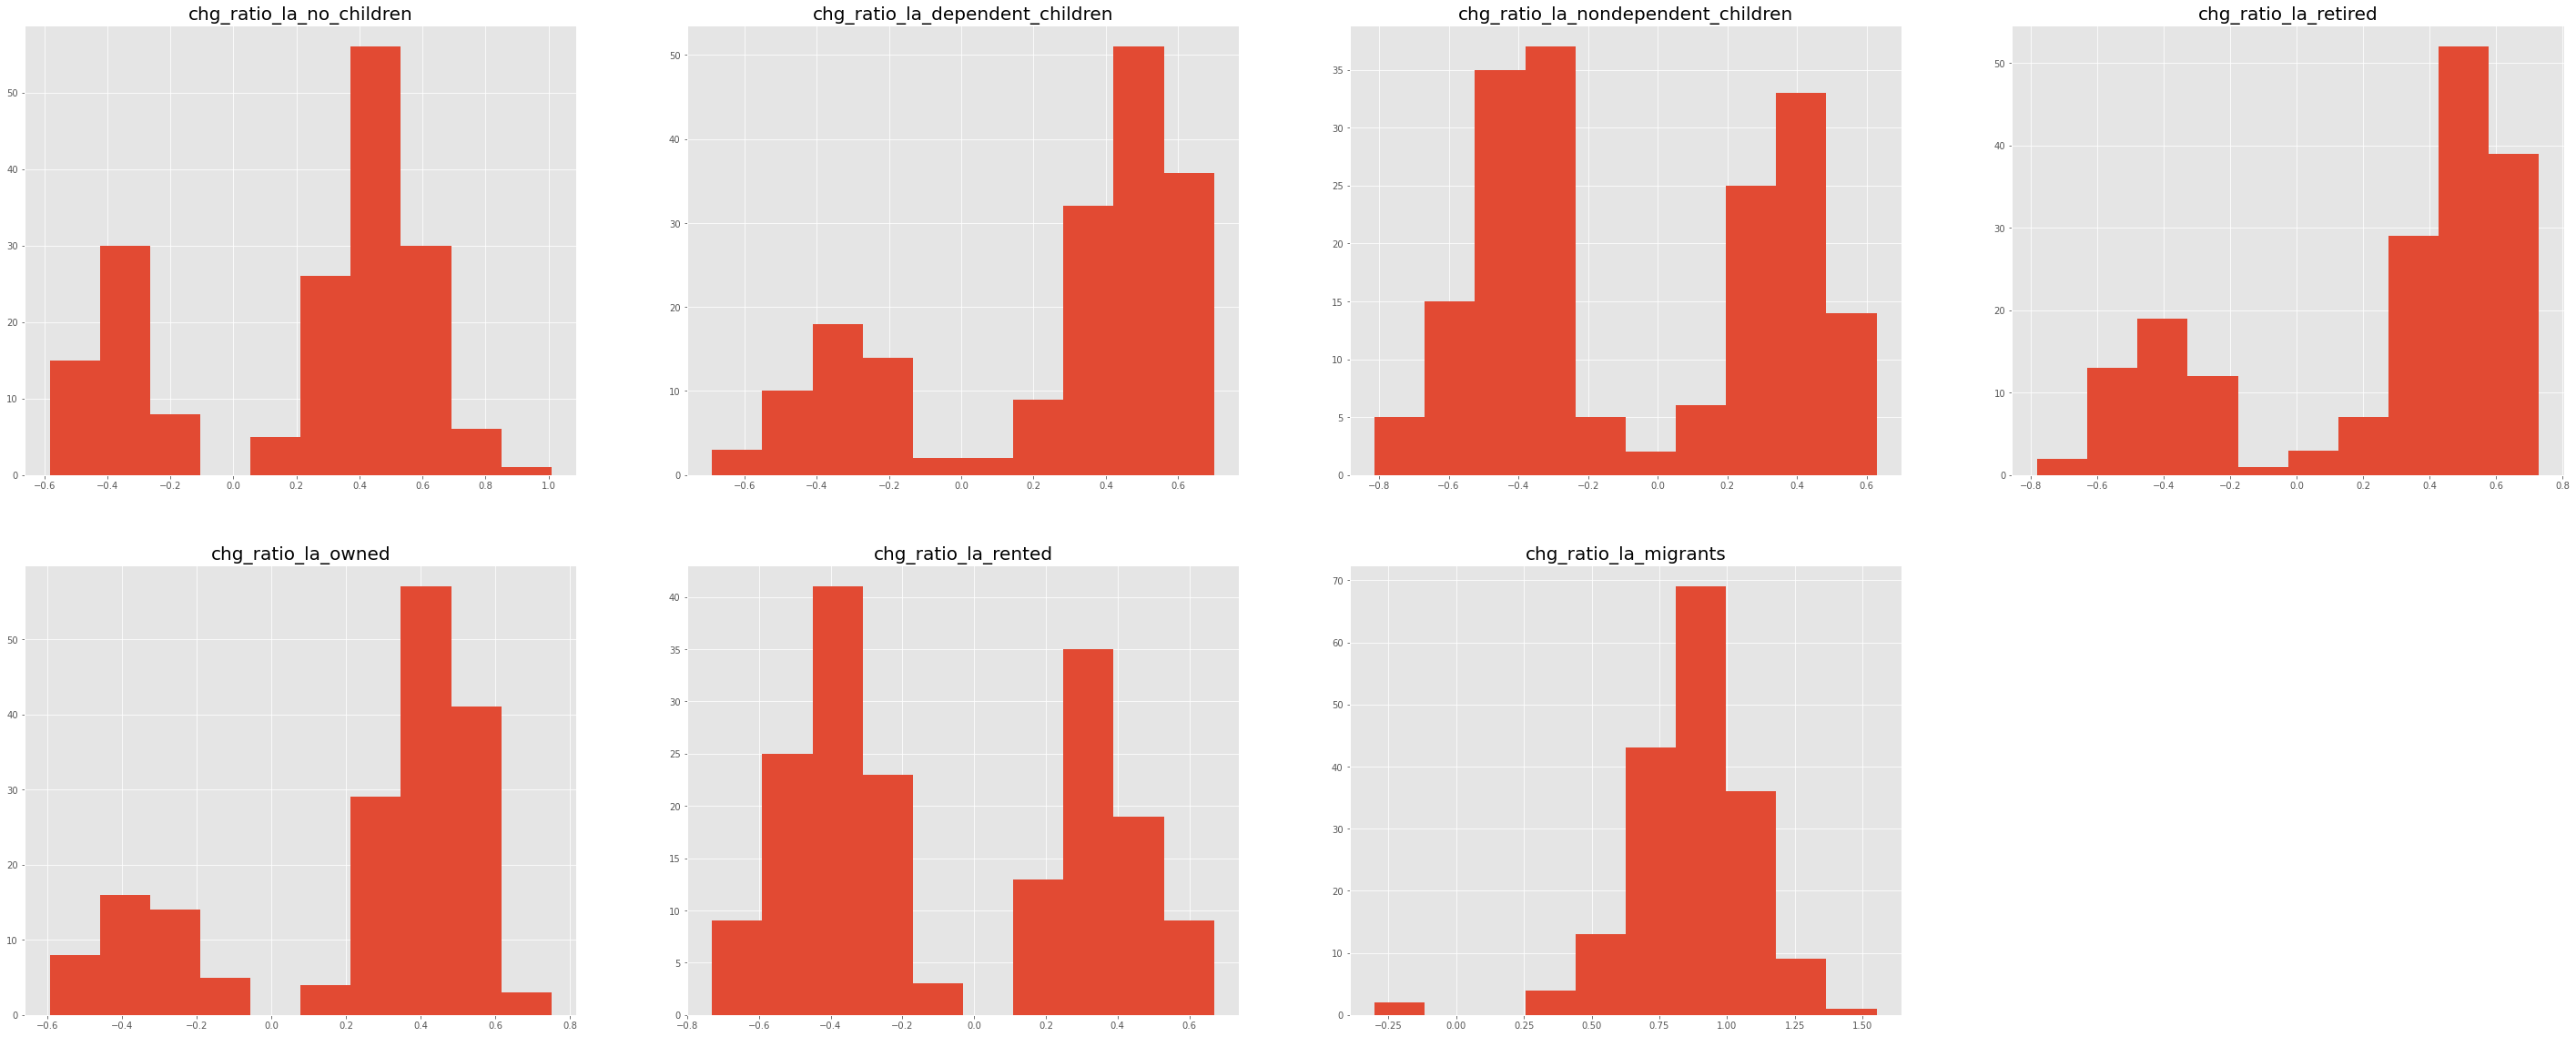

In [21]:
# plot histogram to view underlying distributions

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(50, 20))

counter = 0
for i in range(2):
    for j in range(4):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(cluster_1_cubeRoot.columns):

            ax.hist(cluster_1_cubeRoot[cluster_1_cubeRoot.columns[counter]], label='{}'.format(cluster_1_cubeRoot.columns[counter]))
            ax.set_title(cluster_1_cubeRoot.columns[counter], fontsize=20)

        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1


plt.show()


#plt.savefig('cluster_1_cubeRoot_hist.png', dpi = 100)

In [22]:
# check for heavily-skewed variables (i.e. skewness scores beyond +/- 1)
cluster_1_cubeRoot.skew (axis = 0)

chg_ratio_la_no_children             -0.656794
chg_ratio_la_dependent_children      -0.911480
chg_ratio_la_nondependent_children    0.143023
chg_ratio_la_retired                 -0.916701
chg_ratio_la_owned                   -1.056172
chg_ratio_la_rented                   0.222532
chg_ratio_la_migrants                -1.288968
dtype: float64

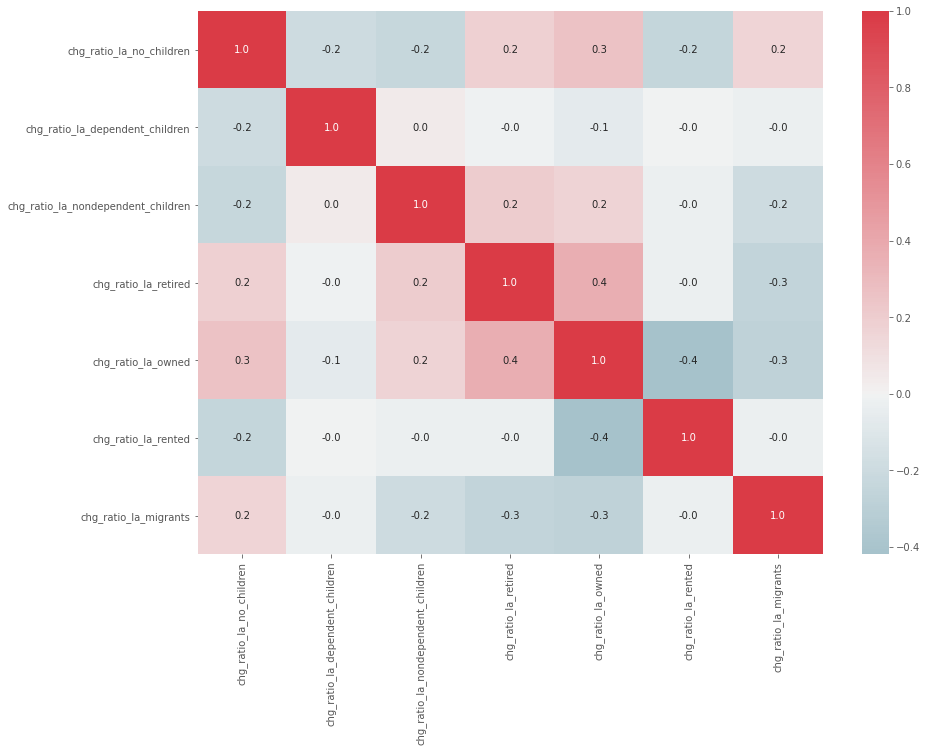

In [23]:
# check for multi-collinearity between variables

fig10, ax = plt.subplots()
fig10.set_size_inches(14, 10)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

ax=sns.heatmap(cluster_1_cubeRoot.corr(), cmap=cmap, annot=True, fmt=".1f", center=0)

#### Yeo-Johnson transformation

In [24]:
# applying the Yeo-Johnson transformation to data variables

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()
pt.fit(asc_cluster)

cluster_1_yeoJohnson_np = pt.transform(asc_cluster)
cluster_1_yeoJohnson = pd.DataFrame(cluster_1_yeoJohnson_np, index = asc_cluster.index, columns = asc_cluster.columns)

In [25]:
cluster_1_yeoJohnson.head()

,chg_ratio_la_no_children,chg_ratio_la_dependent_children,chg_ratio_la_nondependent_children,chg_ratio_la_retired,chg_ratio_la_owned,chg_ratio_la_rented,chg_ratio_la_migrants
MSOA11CD,,,,,,,
E02003123,-1.726222,-0.496780,0.626990,-0.232611,0.131621,-1.150096,0.718028
E02003125,-0.238838,-0.130298,0.688449,0.328813,0.107610,-1.424655,0.305059
E02003130,-0.820231,-0.405066,1.562543,-0.149473,-0.393135,-0.454493,-0.502778
E02003142,0.140830,-0.349653,1.877406,-0.287465,-0.394485,-0.107850,0.604436
E02003147,-0.289626,1.620326,1.230313,-0.505214,-0.183154,-3.318370,1.838476


[Text(0, 0, 'chg_ratio_la_no_children'),
 Text(1, 0, 'chg_ratio_la_dependent_children'),
 Text(2, 0, 'chg_ratio_la_nondependent_children'),
 Text(3, 0, 'chg_ratio_la_retired'),
 Text(4, 0, 'chg_ratio_la_owned'),
 Text(5, 0, 'chg_ratio_la_rented'),
 Text(6, 0, 'chg_ratio_la_migrants')]

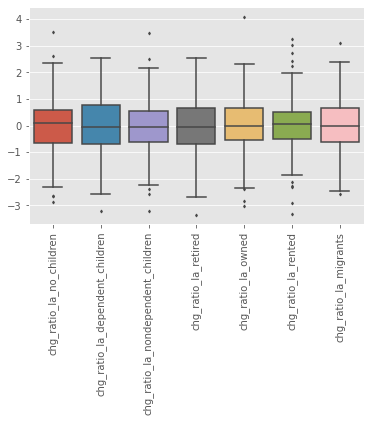

In [26]:
#boxplot of the variables
ax = sns.boxplot( data=cluster_1_yeoJohnson,fliersize=2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
#plt.savefig('plot/p2-yeo-box.png',dpi = 200,bbox_inches = 'tight')

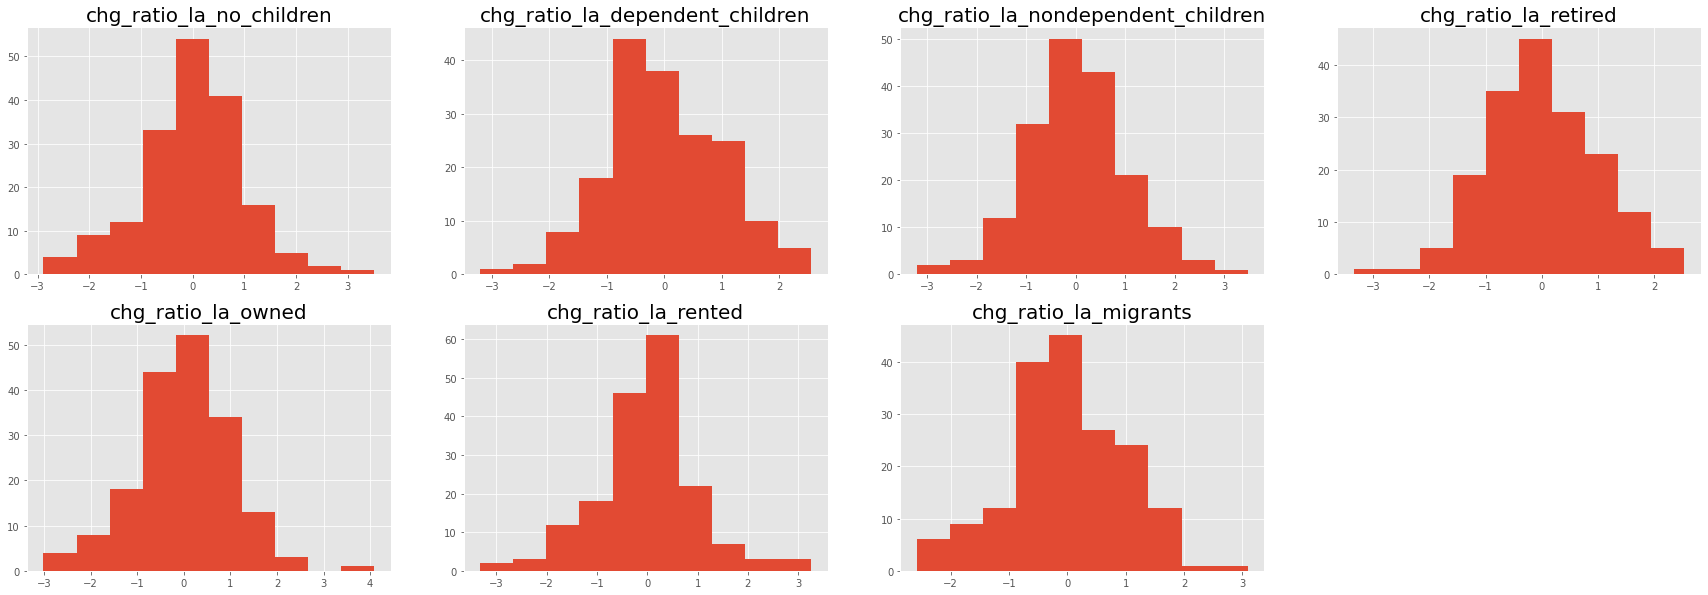

In [27]:
# plot histogram to view underlying distributions

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(30, 10))

counter = 0
for i in range(2):
    for j in range(4):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(cluster_1_yeoJohnson.columns):

            ax.hist(cluster_1_yeoJohnson[cluster_1_yeoJohnson.columns[counter]], label='{}'.format(cluster_1_yeoJohnson.columns[counter]))
            ax.set_title(cluster_1_yeoJohnson.columns[counter], fontsize=20)

        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()
        
        counter += 1
#plt.savefig('plot/p2-yeo-hit.png',dpi = 200,bbox_inches = 'tight')
plt.show()


In [28]:
# check for heavily-skewed variables (i.e. skewness scores beyond +/- 1)
cluster_1_yeoJohnson.skew (axis = 0)

chg_ratio_la_no_children             -0.081516
chg_ratio_la_dependent_children      -0.004208
chg_ratio_la_nondependent_children    0.050453
chg_ratio_la_retired                 -0.000099
chg_ratio_la_owned                    0.022324
chg_ratio_la_rented                   0.015924
chg_ratio_la_migrants                -0.005601
dtype: float64

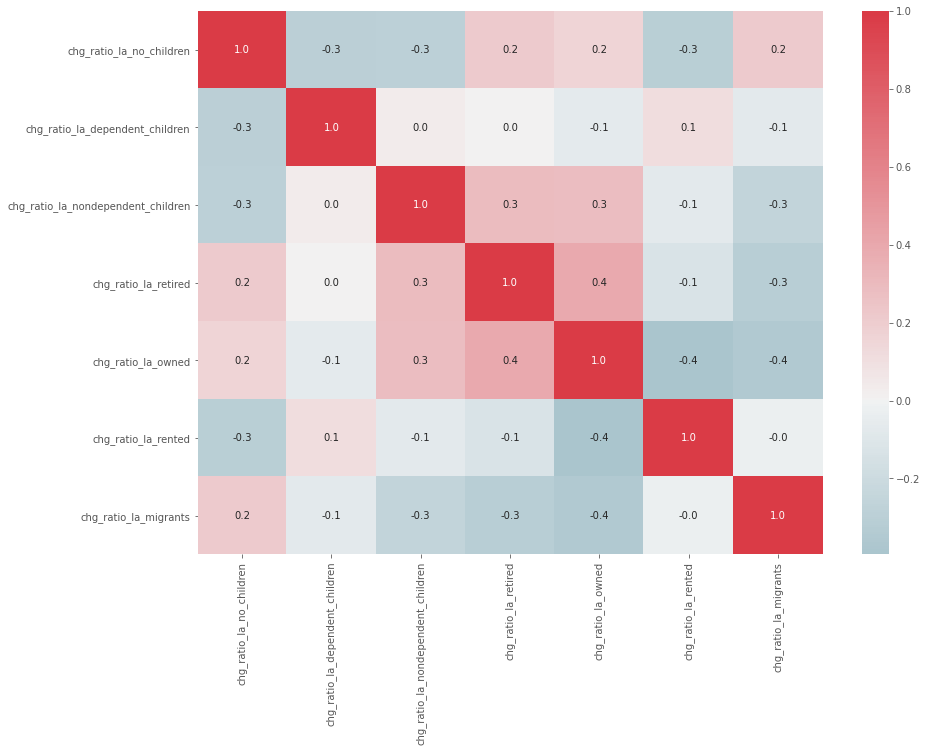

In [29]:
# check for multi-collinearity between variables

fig11, ax = plt.subplots()
fig11.set_size_inches(14, 10)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

ax=sns.heatmap(cluster_1_yeoJohnson.corr(), cmap=cmap, annot=True, fmt=".1f", center=0)

#### Inverse hyperbolic sine transformation

In [30]:
# applying the inverse hyperbolic sine transformation to data variables

cluster_1_invSine = np.arcsinh(asc_cluster)
cluster_1_invSine.head()

,chg_ratio_la_no_children,chg_ratio_la_dependent_children,chg_ratio_la_nondependent_children,chg_ratio_la_retired,chg_ratio_la_owned,chg_ratio_la_rented,chg_ratio_la_migrants
MSOA11CD,,,,,,,
E02003123,-0.115317,0.021732,0.047238,0.056293,0.064469,-0.140307,0.908788
E02003125,0.022068,0.063609,0.052592,0.130918,0.062343,-0.170207,0.750323
E02003130,-0.037598,0.032326,0.122420,0.067685,0.018072,-0.065654,0.473873
E02003142,0.066692,0.038690,0.145105,0.048709,0.017953,-0.029150,0.864106
E02003147,0.016465,0.247743,0.097163,0.018054,0.036619,-0.380187,1.391462


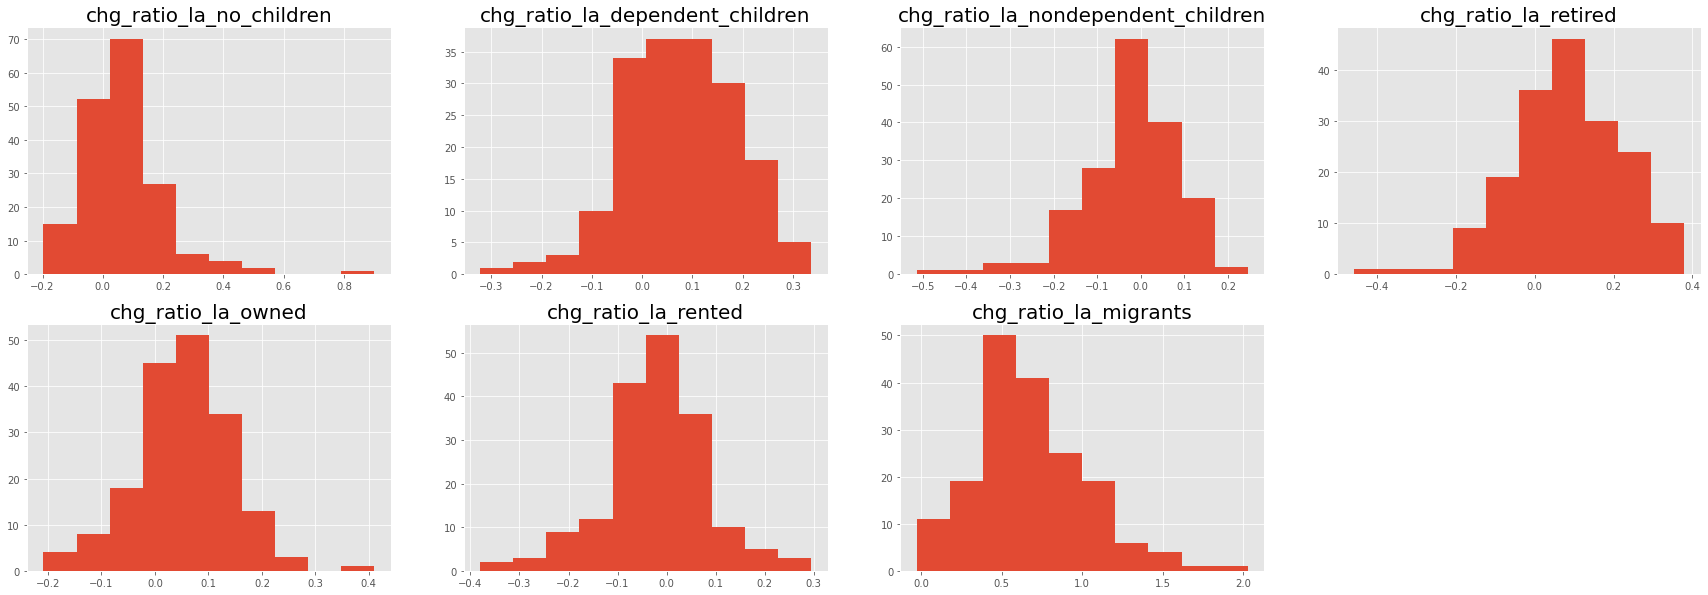

In [31]:
# plot histogram to view underlying distributions

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(30, 10))

counter = 0
for i in range(2):
    for j in range(4):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(cluster_1_invSine.columns):

            ax.hist(cluster_1_invSine[cluster_1_invSine.columns[counter]], label='{}'.format(cluster_1_invSine.columns[counter]))
            ax.set_title(cluster_1_invSine.columns[counter], fontsize=20)

        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1

plt.show()


#plt.savefig('cluster_1_invSine.png', dpi = 100)

In [32]:
# check for heavily-skewed variables (i.e. skewness scores beyond +/- 1)
cluster_1_invSine.skew (axis = 0)

chg_ratio_la_no_children              1.791493
chg_ratio_la_dependent_children      -0.247622
chg_ratio_la_nondependent_children   -0.977533
chg_ratio_la_retired                 -0.421407
chg_ratio_la_owned                    0.033940
chg_ratio_la_rented                  -0.188521
chg_ratio_la_migrants                 0.604544
dtype: float64

Result: Yeo-Johnson transformation better reduces the skewness of the data. 

### Data re-scaling 

In [33]:
# applying MinMaxScaler on original datasets

from sklearn.preprocessing import MinMaxScaler

transformer1 = MinMaxScaler().fit(asc_cluster)
asc_cluster_minmax = transformer1.transform(asc_cluster)
asc_cluster_minmax = pd.DataFrame(asc_cluster_minmax, index = asc_cluster.index, columns = asc_cluster.columns)

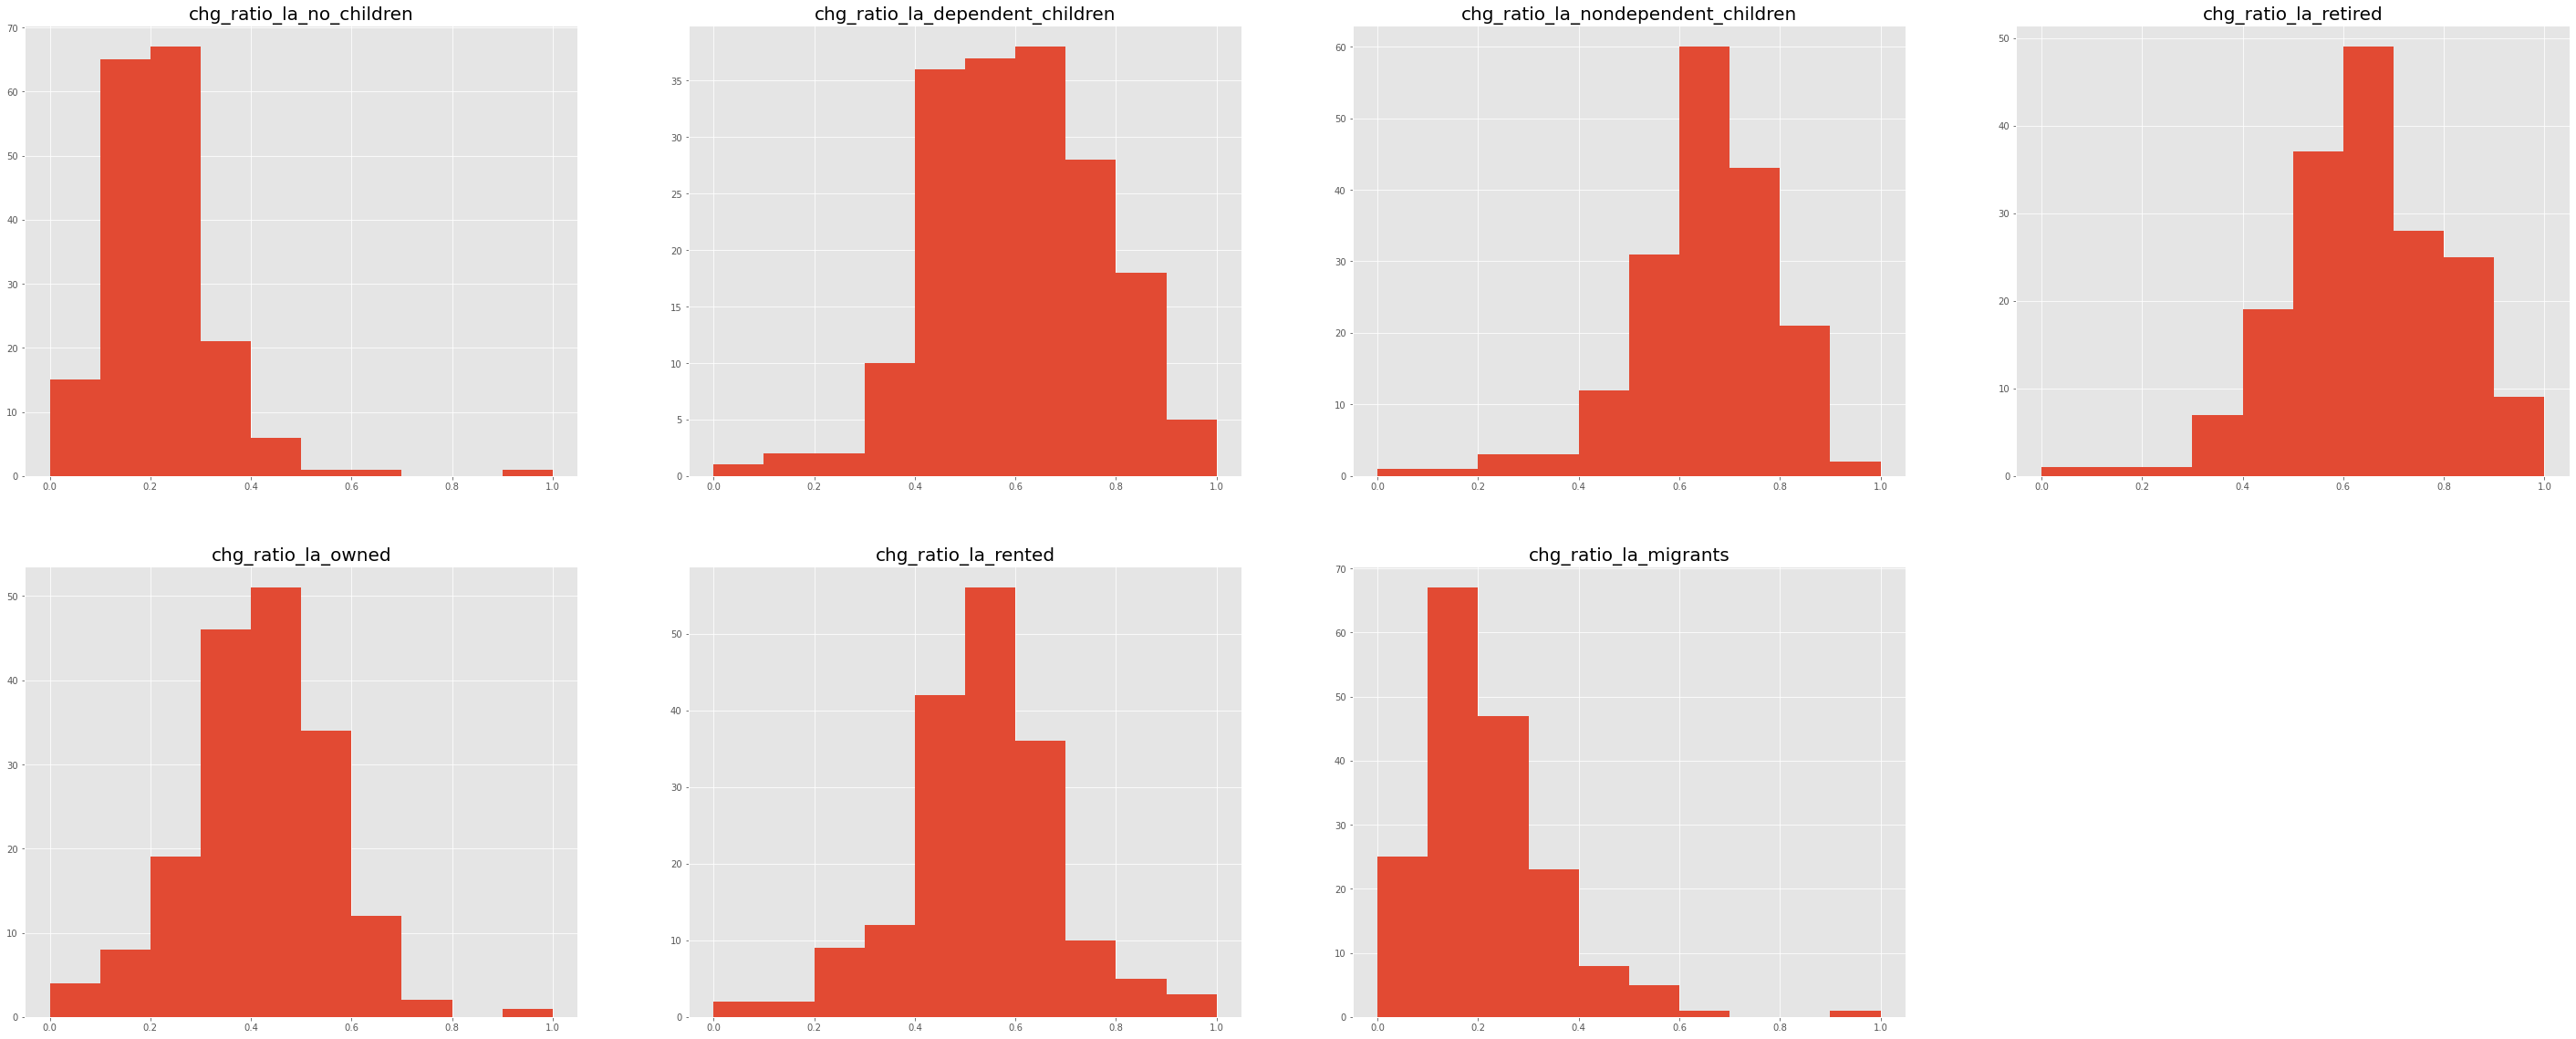

In [34]:
# plot histogram to view underlying distributions

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(50, 20))

counter = 0
for i in range(2):
    for j in range(4):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(asc_cluster_minmax.columns):

            ax.hist(asc_cluster_minmax[asc_cluster_minmax.columns[counter]], label='{}'.format(asc_cluster_minmax.columns[counter]))
            ax.set_title(asc_cluster_minmax.columns[counter], fontsize=20)

        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1
        
plt.show()
        
# plt.savefig('Cluster_1_hist.png', dpi = 100

#### Yeo-Johnson transformation + RobustScaler

In [35]:
from sklearn.preprocessing import RobustScaler
# scaling the stacked data using RobustScaler
Robust_transformer = RobustScaler().fit(cluster_1_yeoJohnson)
cluster_1_yeoJohnson_robust = Robust_transformer.transform(cluster_1_yeoJohnson)
cluster_1_yeoJohnson_robust = pd.DataFrame(cluster_1_yeoJohnson_robust, index = cluster_1_yeoJohnson.index, columns = cluster_1_yeoJohnson.columns)

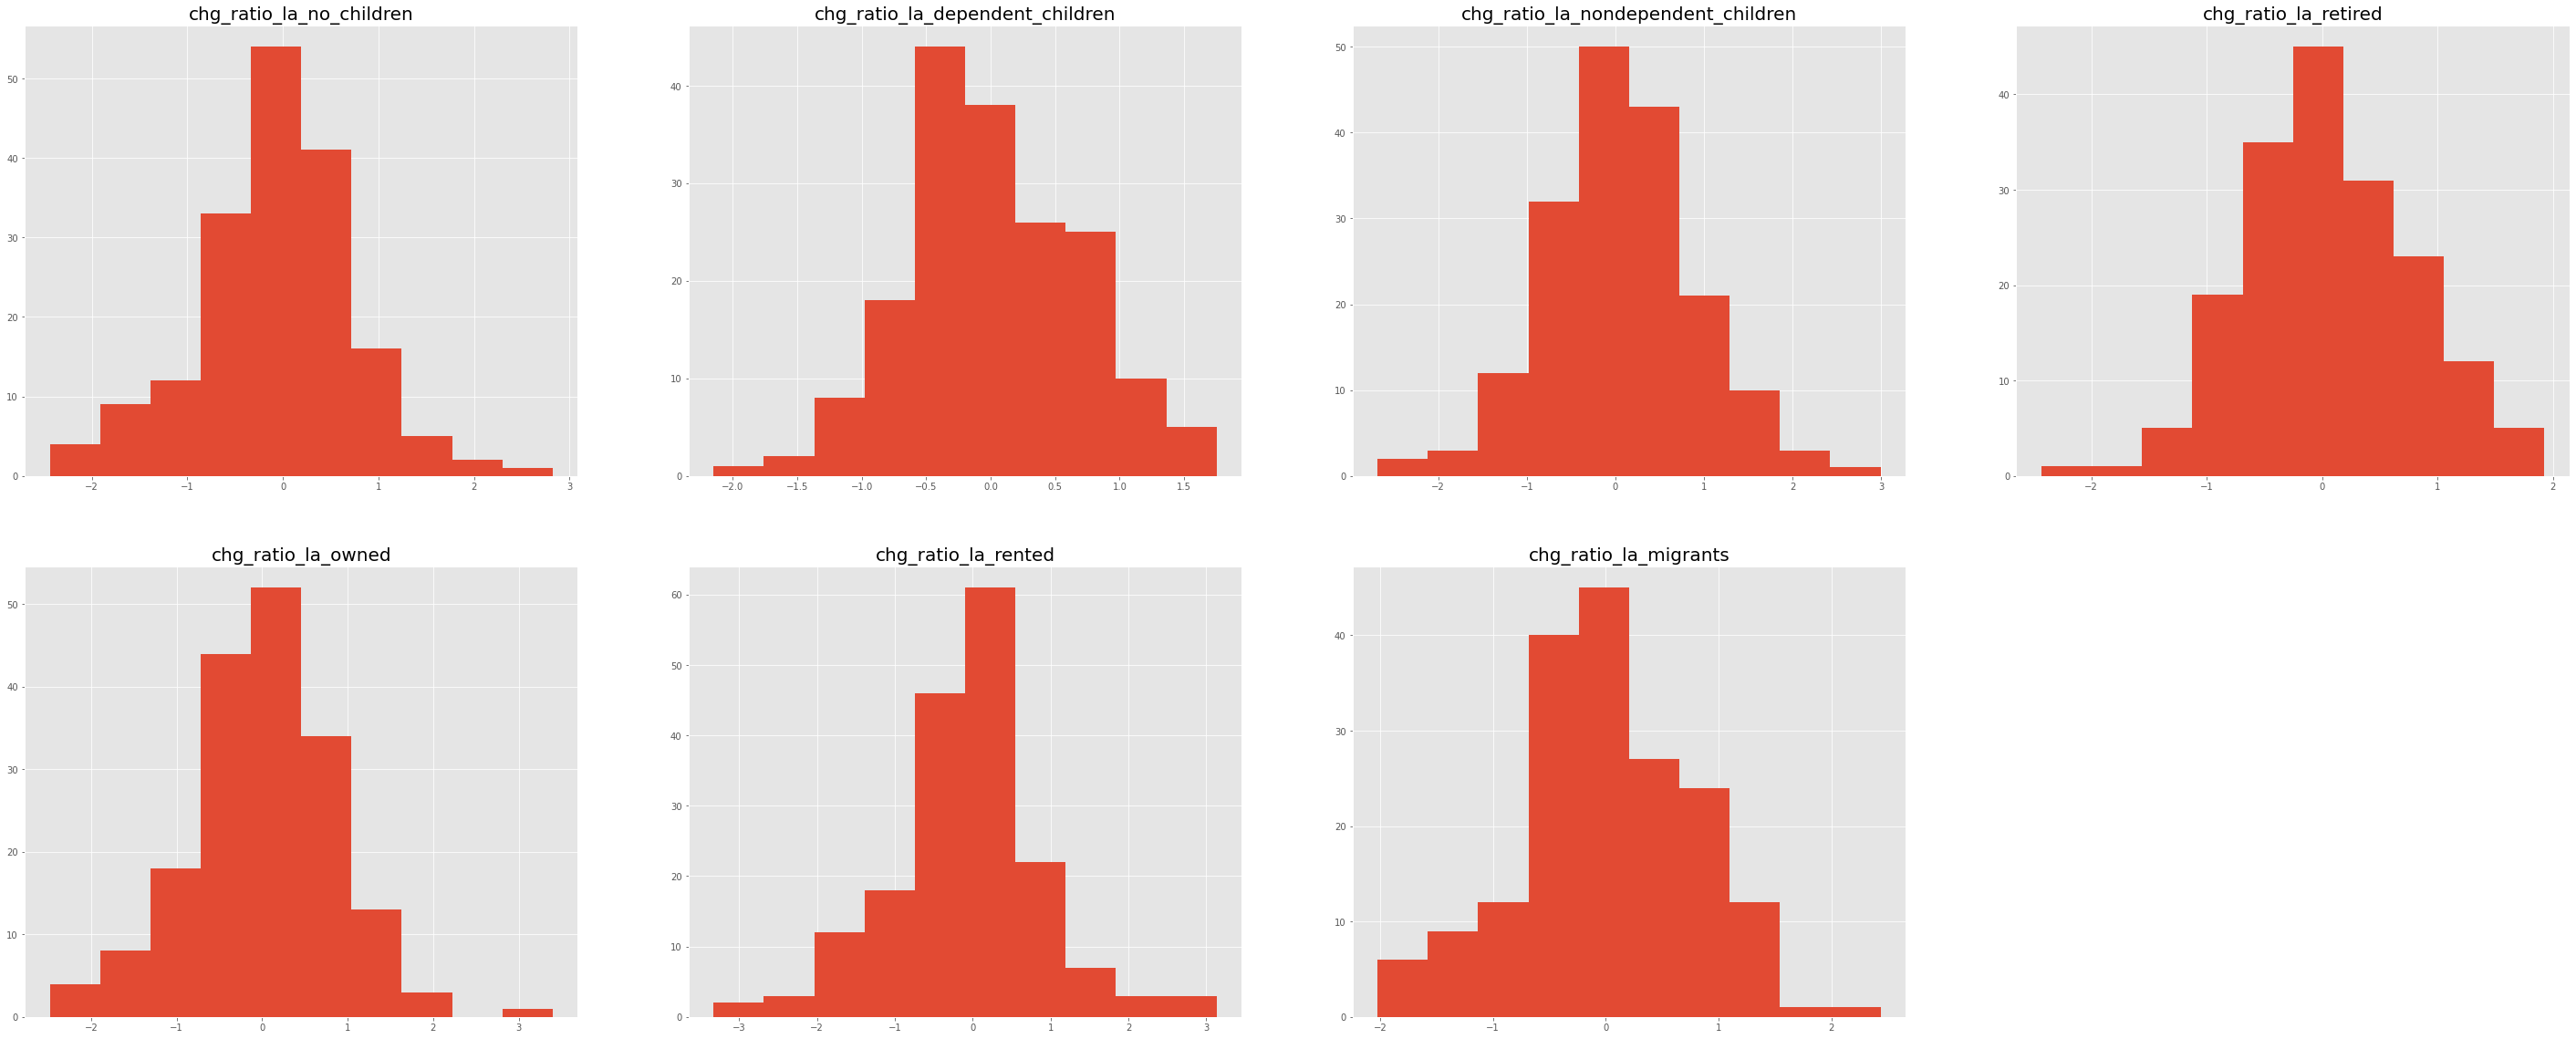

In [36]:
# plot histogram to view underlying distributions

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(50, 20))

counter = 0
for i in range(2):
    for j in range(4):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(cluster_1_yeoJohnson_robust.columns):

            ax.hist(cluster_1_yeoJohnson_robust[cluster_1_yeoJohnson_robust.columns[counter]], label='{}'.format(cluster_1_yeoJohnson_robust.columns[counter]))
            ax.set_title(cluster_1_yeoJohnson_robust.columns[counter], fontsize=20)

        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1
#plt.savefig('plot/p2-yeominmax-his.png',dpi = 200,bbox_inches = 'tight')        
plt.show()
        


#### Yeo-Johnson transformation + MinMaxScaler

In [37]:
transformer2 = MinMaxScaler().fit(cluster_1_yeoJohnson)
cluster_1_yeoJohnson_minmax = transformer2.transform(cluster_1_yeoJohnson)
cluster_1_yeoJohnson_minmax = pd.DataFrame(cluster_1_yeoJohnson_minmax, index = cluster_1_yeoJohnson.index, columns = cluster_1_yeoJohnson.columns)

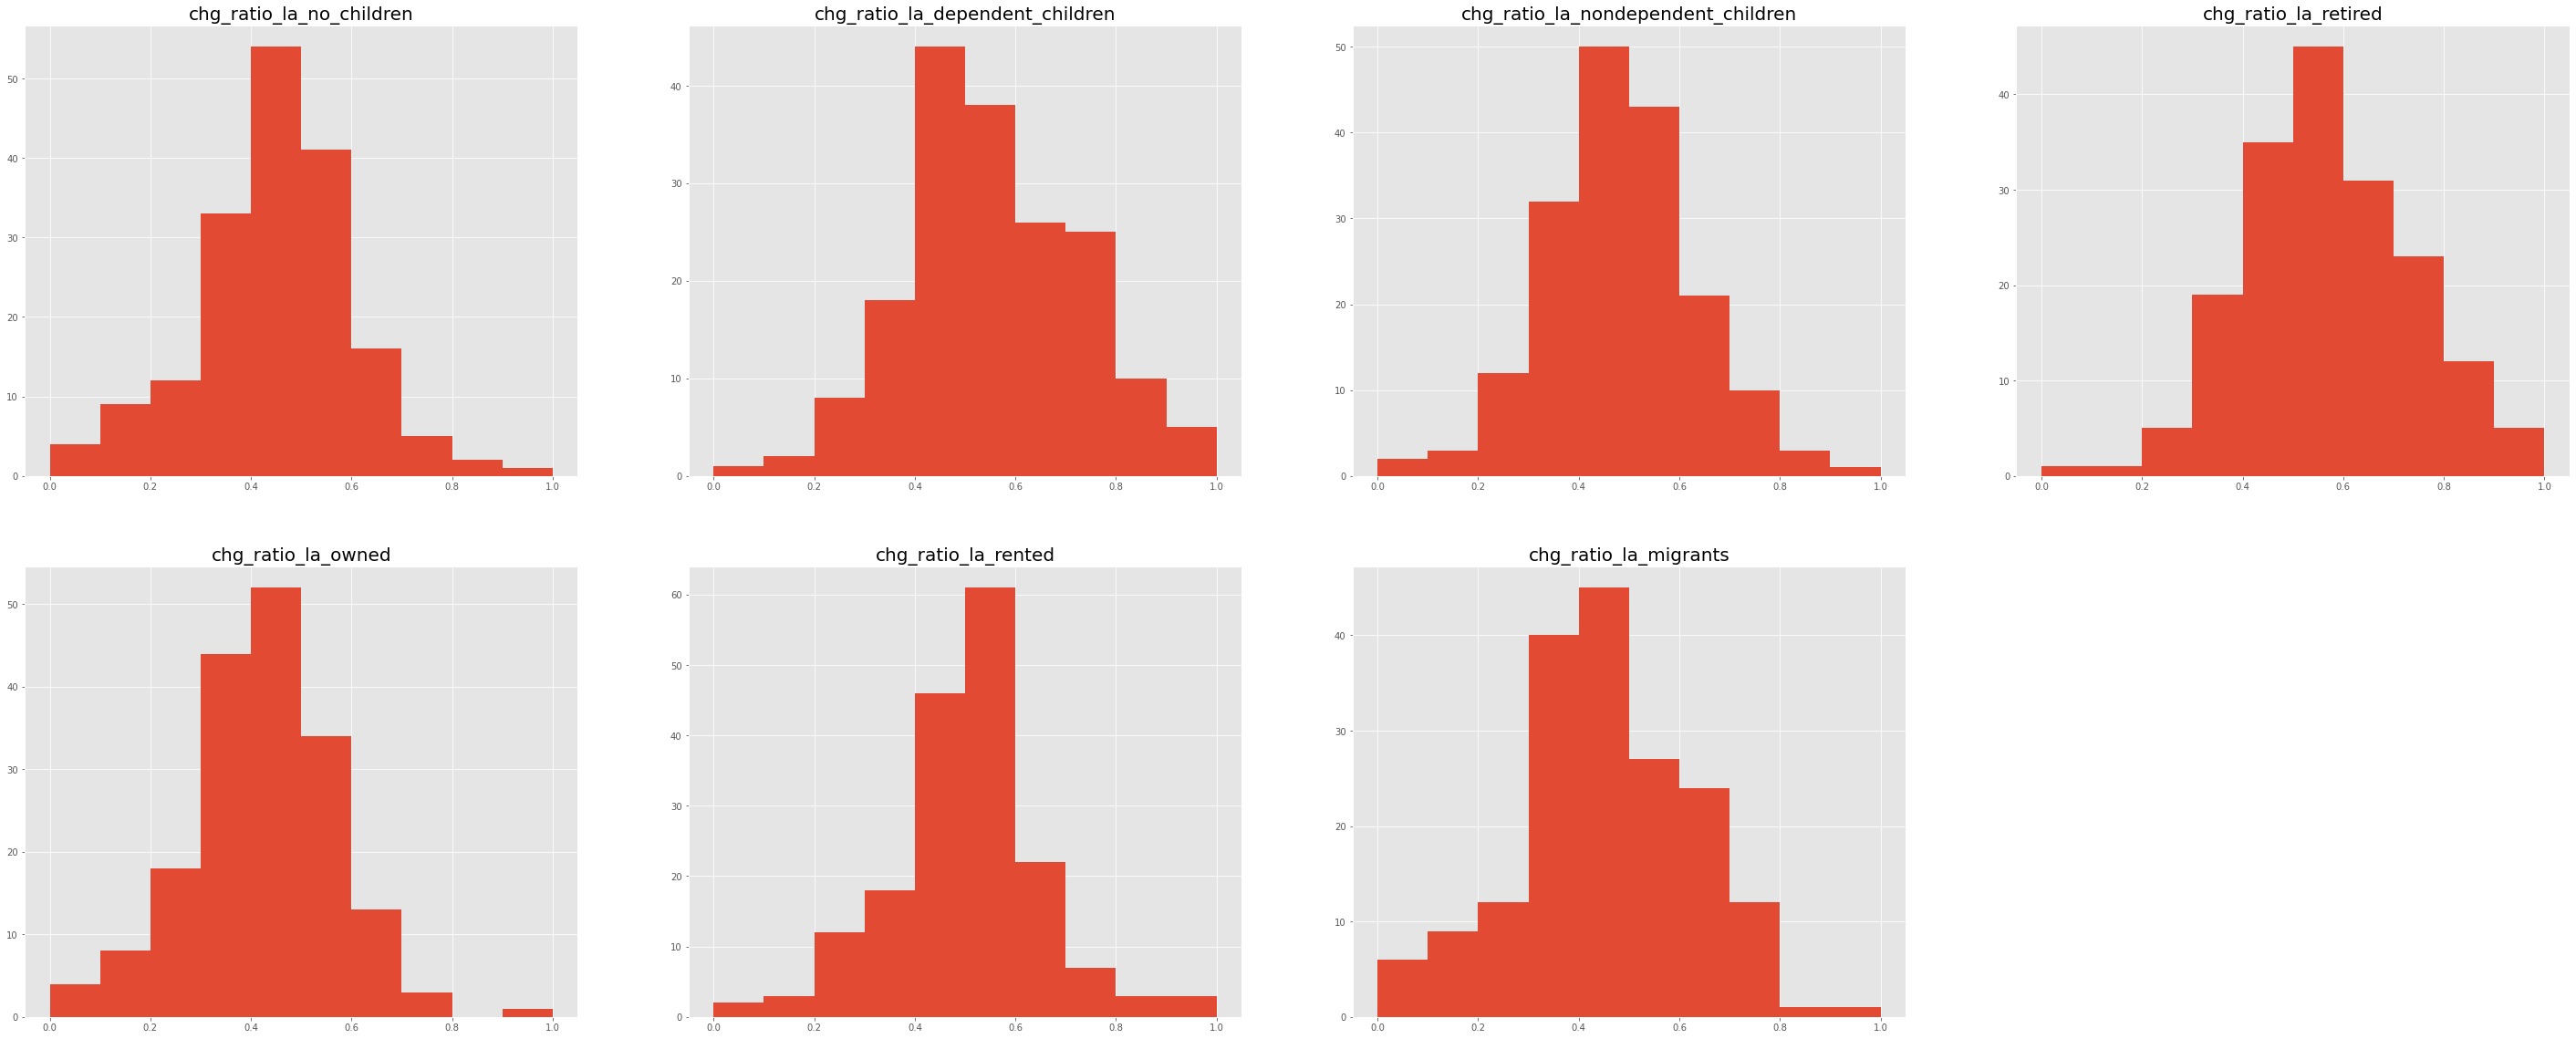

In [38]:
# plot histogram to view underlying distributions

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(50, 20))

counter = 0
for i in range(2):
    for j in range(4):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(cluster_1_yeoJohnson_minmax.columns):

            ax.hist(cluster_1_yeoJohnson_minmax[cluster_1_yeoJohnson_minmax.columns[counter]], label='{}'.format(cluster_1_yeoJohnson_minmax.columns[counter]))
            ax.set_title(cluster_1_yeoJohnson_minmax.columns[counter], fontsize=20)

        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1
#plt.savefig('plot/p2-yeominmax-his.png',dpi = 200,bbox_inches = 'tight')        
plt.show()
        


[Text(0, 0, 'chg_ratio_la_no_children'),
 Text(1, 0, 'chg_ratio_la_dependent_children'),
 Text(2, 0, 'chg_ratio_la_nondependent_children'),
 Text(3, 0, 'chg_ratio_la_retired'),
 Text(4, 0, 'chg_ratio_la_owned'),
 Text(5, 0, 'chg_ratio_la_rented'),
 Text(6, 0, 'chg_ratio_la_migrants')]

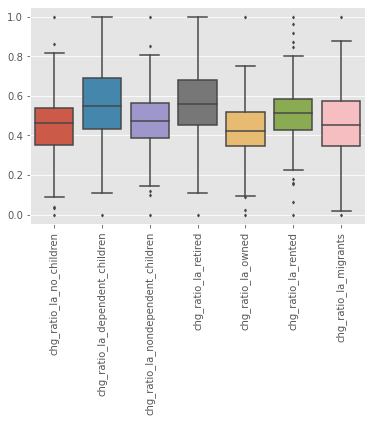

In [39]:
#boxplot of the variables
ax = sns.boxplot( data=cluster_1_yeoJohnson_minmax,fliersize=2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
#plt.savefig('plot/p2-yeominmax-box.png',dpi = 200,bbox_inches = 'tight')

### Clustering

Compare the quality of the clustering of three groups of input dataset
1. original dataset with Yeo-Johnson transformation
2. original dataset with MinMaxScaler
3. original dataset with first  Yeo-Johnson transformation then MinMaxScaler

#### Yeo-Johnson transformation

For n_clusters = 2 The average silhouette_score is : 0.1552239982222769
For n_clusters = 3 The average silhouette_score is : 0.14618067577437455
For n_clusters = 4 The average silhouette_score is : 0.12398543871680535
For n_clusters = 5 The average silhouette_score is : 0.13339612302754064
For n_clusters = 6 The average silhouette_score is : 0.13617229219489438
For n_clusters = 7 The average silhouette_score is : 0.13141734458233703


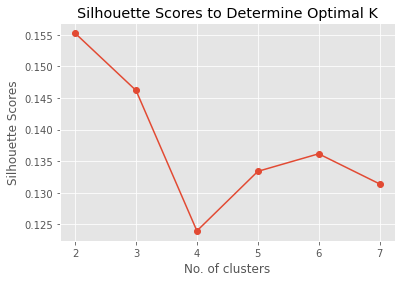

In [40]:
# check and plot silhouette scores to determine the optimal number of clusters

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []
range_n_clusters = [2, 3, 4, 5, 6, 7]
Sum_of_squared_distances = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(cluster_1_yeoJohnson)
    Sum_of_squared_distances.append(clusterer.inertia_)
    
    silhouette_avg = silhouette_score(cluster_1_yeoJohnson, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    
plt.plot(range_n_clusters, silhouette_scores, 'o-')
plt.xlabel('No. of clusters')
plt.ylabel('Silhouette Scores')
plt.title('Silhouette Scores to Determine Optimal K')
plt.savefig('plot/p2-yeo-silhouette.png',dpi = 200,bbox_inches = 'tight')
plt.show()

#### Yeo+RobustScaler

For n_clusters = 2 The average silhouette_score is : 0.1545585113792083
For n_clusters = 3 The average silhouette_score is : 0.14961101081140918
For n_clusters = 4 The average silhouette_score is : 0.12766476436291013
For n_clusters = 5 The average silhouette_score is : 0.13631343429984974
For n_clusters = 6 The average silhouette_score is : 0.1376769840719141
For n_clusters = 7 The average silhouette_score is : 0.1450505368968549


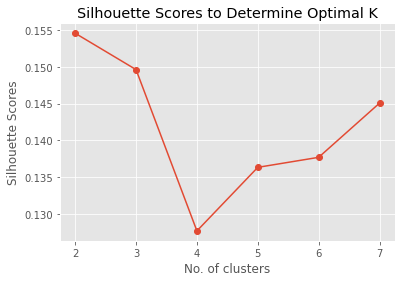

In [41]:
# check and plot silhouette scores to determine the optimal number of clusters

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []
range_n_clusters = [2, 3, 4, 5, 6, 7]
Sum_of_squared_distances = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(cluster_1_yeoJohnson_robust)
    Sum_of_squared_distances.append(clusterer.inertia_)
    
    silhouette_avg = silhouette_score(cluster_1_yeoJohnson_robust, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    
plt.plot(range_n_clusters, silhouette_scores, 'o-')
plt.xlabel('No. of clusters')
plt.ylabel('Silhouette Scores')
plt.title('Silhouette Scores to Determine Optimal K')
plt.savefig('plot/p2-yeorobust-silhouette.png',dpi = 200,bbox_inches = 'tight')
plt.show()

#### Yeo-Johnson transformation + MinMaxScaler

For n_clusters = 2 The average silhouette_score is : 0.15636319907029234
For n_clusters = 3 The average silhouette_score is : 0.13685296686020698
For n_clusters = 4 The average silhouette_score is : 0.1357645440402175
For n_clusters = 5 The average silhouette_score is : 0.13389276161852717
For n_clusters = 6 The average silhouette_score is : 0.13823085707546068
For n_clusters = 7 The average silhouette_score is : 0.14363421495372192


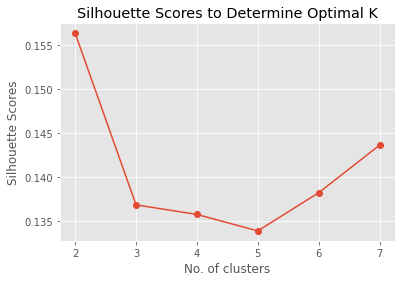

In [42]:
# check and plot silhouette scores to determine the optimal number of clusters

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []
range_n_clusters = [2, 3, 4, 5, 6, 7]
Sum_of_squared_distances = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(cluster_1_yeoJohnson_minmax)
    Sum_of_squared_distances.append(clusterer.inertia_)
    
    silhouette_avg = silhouette_score(cluster_1_yeoJohnson_minmax, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    
plt.plot(range_n_clusters, silhouette_scores, 'o-')
plt.xlabel('No. of clusters')
plt.ylabel('Silhouette Scores')
plt.title('Silhouette Scores to Determine Optimal K')
plt.savefig('plot/p2-yeominmax-silhouette.png',dpi = 200,bbox_inches = 'tight')
plt.show()

#### Compare the quality of clustering using Calinski-Harabasz Index

In [43]:
# creating empty array to hold the performance measure for each cluster derived from individual dataset permutation

permutation = ["yeoJohnson","minmax","yeoJohnson-minmax"]
calinski_harabasz_scores = []

In [44]:

asc_cluster_yeoJohnson_robust_kmeans = KMeans(n_clusters=2, init = "k-means++", random_state=0, n_init=100, max_iter=50).fit(cluster_1_yeoJohnson_robust)
asc_cluster_yeoJohnson_robust_labels = asc_cluster_yeoJohnson_robust_kmeans.labels_
asc_cluster_yeoJohnson_robust_original = asc_cluster[:]
asc_cluster_yeoJohnson_robust_original["asc_cluster_yeoJohnson_robust_labels"]=asc_cluster_yeoJohnson_robust_labels

asc_cluster_yeoJohnson_kmeans = KMeans(n_clusters=2, init = "k-means++", random_state=0, n_init=100, max_iter=50).fit(cluster_1_yeoJohnson)
asc_cluster_yeoJohnson_labels = asc_cluster_yeoJohnson_kmeans.labels_
asc_cluster_yeoJohnson_original = asc_cluster[:]
asc_cluster_yeoJohnson_original["asc_cluster_yeoJohnson_labels"]=asc_cluster_yeoJohnson_labels

asc_cluster_yeoJohnson_minmax_kmeans = KMeans(n_clusters=2, init = "k-means++", random_state=0, n_init=100, max_iter=50).fit(cluster_1_yeoJohnson_minmax)
asc_cluster_yeoJohnson_minmax_labels = asc_cluster_yeoJohnson_minmax_kmeans.labels_
asc_cluster_yeoJohnson_minmax_original = asc_cluster[:]
asc_cluster_yeoJohnson_minmax_original["asc_cluster_yeoJohnson_minmax_labels"]=asc_cluster_yeoJohnson_minmax_labels

/opt/conda/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/conda/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [45]:
# measuring the performance for yeo-johnson dataset permutations

from sklearn import metrics
from sklearn.metrics import pairwise_distances

print(metrics.calinski_harabasz_score(asc_cluster_yeoJohnson_robust_original, asc_cluster_yeoJohnson_robust_labels))
calinski_harabasz_scores.append(metrics.calinski_harabasz_score(asc_cluster_yeoJohnson_robust_original, asc_cluster_yeoJohnson_robust_labels))

print(metrics.calinski_harabasz_score(asc_cluster_yeoJohnson_original, asc_cluster_yeoJohnson_labels))
calinski_harabasz_scores.append(metrics.calinski_harabasz_score(asc_cluster_yeoJohnson_original, asc_cluster_yeoJohnson_labels))

print(metrics.calinski_harabasz_score(asc_cluster_yeoJohnson_minmax_original, asc_cluster_yeoJohnson_minmax_labels))
calinski_harabasz_scores.append(metrics.calinski_harabasz_score(asc_cluster_yeoJohnson_minmax_original, asc_cluster_yeoJohnson_minmax_labels))



179.747819600018
192.00771801606692
235.36603146962827


In [46]:
# extracting cluster details of the best-performing dataset

asc_cluster_yeoJohnson_minmax_original.groupby("asc_cluster_yeoJohnson_minmax_labels").size()

asc_cluster_yeoJohnson_minmax_labels
0    80
1    97
dtype: int64

In [47]:
# appending cluster labels to main dataset

cluster_1_yeoJohnson_minmax["asc_cluster_yeoJohnson_minmax_labels"]=asc_cluster_yeoJohnson_minmax_labels

In [48]:
# creating a new dataset for plotting purposes

radar_1 = cluster_1_yeoJohnson_minmax.groupby("asc_cluster_yeoJohnson_minmax_labels").mean().reset_index()

In [49]:
radar_1.head()

,asc_cluster_yeoJohnson_minmax_labels,chg_ratio_la_no_children,chg_ratio_la_dependent_children,chg_ratio_la_nondependent_children,chg_ratio_la_retired,chg_ratio_la_owned,chg_ratio_la_rented,chg_ratio_la_migrants
0,0,0.456599,0.581265,0.538747,0.684812,0.503876,0.475078,0.335279
1,1,0.446187,0.536863,0.431536,0.473753,0.357952,0.529553,0.552781


In [50]:
# check the means of the entire dataset

cluster_1_yeoJohnson_minmax.mean()

chg_ratio_la_no_children                0.450893
chg_ratio_la_dependent_children         0.556932
chg_ratio_la_nondependent_children      0.479993
chg_ratio_la_retired                    0.569147
chg_ratio_la_owned                      0.423906
chg_ratio_la_rented                     0.504932
chg_ratio_la_migrants                   0.454475
asc_cluster_yeoJohnson_minmax_labels    0.548023
dtype: float64

In [51]:
# appending dataset average values to main dataset

radar_avg = cluster_1_yeoJohnson_minmax.drop(columns = ["asc_cluster_yeoJohnson_minmax_labels"]).mean().reset_index()

In [52]:
# rename columns for legibility

radar_avg = radar_avg.rename(columns={"index":"var", 0: "value"})

In [53]:
radar_avg.head(8)

,var,value
0,chg_ratio_la_no_children,0.450893
1,chg_ratio_la_dependent_children,0.556932
2,chg_ratio_la_nondependent_children,0.479993
3,chg_ratio_la_retired,0.569147
4,chg_ratio_la_owned,0.423906
5,chg_ratio_la_rented,0.504932
6,chg_ratio_la_migrants,0.454475


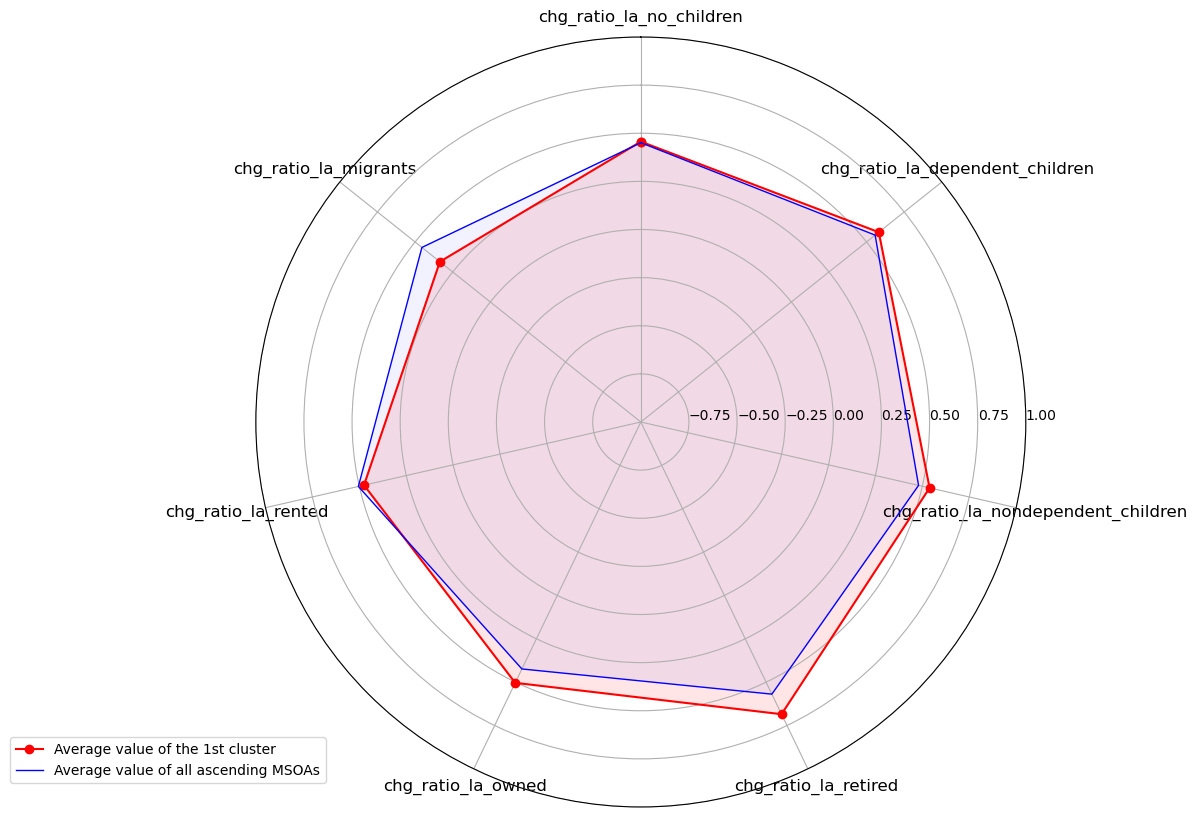

In [54]:
# Reference for code: https://python-graph-gallery.com/391-radar-chart-with-several-individuals/
# plot the 1st cluster
plt.style.use('default')
from math import pi

fig1, ax = plt.subplots()
fig1.set_size_inches(14, 10)

# number of variable
categories=list(radar_1)[1:]
N = len(categories)
 
# plotting for the 1st variable
values=radar_1.iloc[0,1:].values.flatten().tolist()
values += values[:1]
values

# ------- PART 1: Create background
 
# number of variables
categories=list(radar_1)[1:]
N = len(categories)
 
# angles for plotting
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories,color='black', size = 12)
 
# Draw ylabels
ax.set_rlabel_position(90)
plt.ylim(-1,1)
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# Ind1
values=radar_1.iloc[0,1:].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, 'red',linewidth=1.5, linestyle='solid', marker="o", label="Average value of the 1st cluster")
ax.fill(angles, values, 'red', alpha=0.1)
 
# Ind2
values=radar_avg.iloc[:,1].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, 'blue',linewidth=1, linestyle='solid', label="Average value of all ascending MSOAs")
ax.fill(angles, values, 'blue', alpha=0.05)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
#plt.savefig('plot/p2-radar-iup.png',dpi = 200,bbox_inches = 'tight')


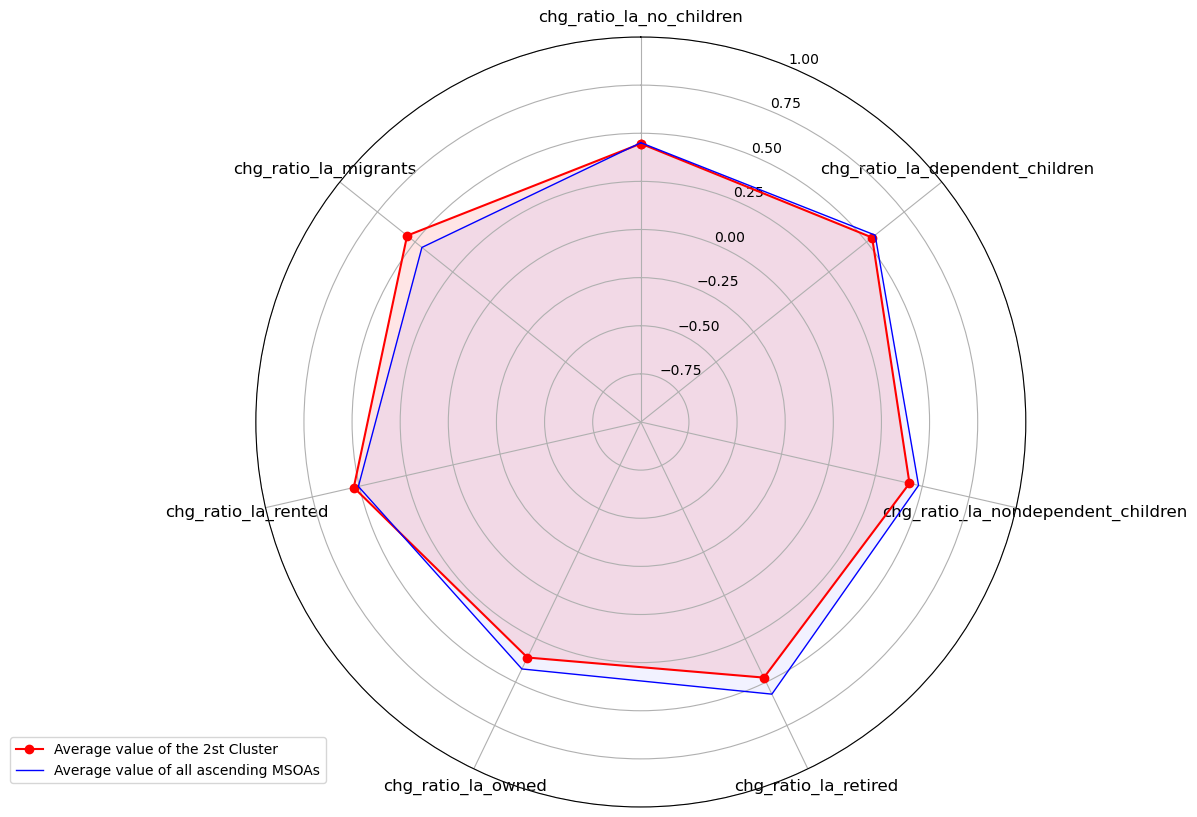

In [55]:
# Reference for code: https://python-graph-gallery.com/391-radar-chart-with-several-individuals/
# plot the 2nd cluster

fig2, ax = plt.subplots()
fig2.set_size_inches(14, 10)

# number of variable
categories=list(radar_1)[1:]
N = len(categories)
 
# plotting for the 1st variable
values=radar_1.iloc[0,1:].values.flatten().tolist()
values += values[:1]
values

# ------- PART 1: Create background
 
# number of variable
categories=list(radar_1)[1:]
N = len(categories)
 
# angles for plotting
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, size = 12)
 
# Draw ylabels
plt.ylim(-1,1)

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
 
# Ind1
values=radar_1.iloc[1,1:].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, 'red',linewidth=1.5, linestyle='solid', marker="o", label="Average value of the 2st Cluster")
ax.fill(angles, values, 'red', alpha=0.1)
 
# Ind2
values=radar_avg.iloc[:,1].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, 'blue',linewidth=1, linestyle='solid', label="Average value of all ascending MSOAs")
ax.fill(angles, values, 'blue', alpha=0.05)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

#plt.savefig('plot/p2-radar-gen.png',dpi = 200,bbox_inches = 'tight')

---

In [56]:
# create new feature column in main dataset to host label categories

asc_cluster_yeoJohnson_minmax_cat = asc_cluster_yeoJohnson_minmax_original[:].reset_index()
asc_cluster_yeoJohnson_minmax_cat["asc_cluster_yeoJohnson_minmax_cat"] = ""

In [57]:
asc_cluster_yeoJohnson_minmax_cat.head()

,MSOA11CD,chg_ratio_la_no_children,chg_ratio_la_dependent_children,chg_ratio_la_nondependent_children,chg_ratio_la_retired,chg_ratio_la_owned,chg_ratio_la_rented,chg_ratio_la_migrants,asc_cluster_yeoJohnson_minmax_labels,asc_cluster_yeoJohnson_minmax_cat
0,E02003123,-0.115573,0.021733,0.047255,0.056323,0.064513,-0.140768,1.039150,1,
1,E02003125,0.022070,0.063652,0.052616,0.131292,0.062383,-0.171030,0.822735,0,
2,E02003130,-0.037607,0.032332,0.122726,0.067736,0.018073,-0.065701,0.491808,0,
3,E02003142,0.066742,0.038700,0.145615,0.048728,0.017954,-0.029154,0.975727,1,
4,E02003147,0.016466,0.250285,0.097316,0.018055,0.036627,-0.389412,1.886007,1,


In [58]:
# parse cluster labels to derive their categories 

for i in range(len(asc_cluster_yeoJohnson_minmax_cat)):
    if asc_cluster_yeoJohnson_minmax_cat.loc[i, "asc_cluster_yeoJohnson_minmax_labels"]==1:
        asc_cluster_yeoJohnson_minmax_cat.loc[i, "asc_cluster_yeoJohnson_minmax_cat"]="GEN"
    elif asc_cluster_yeoJohnson_minmax_cat.loc[i, "asc_cluster_yeoJohnson_minmax_labels"]==0:
        asc_cluster_yeoJohnson_minmax_cat.loc[i, "asc_cluster_yeoJohnson_minmax_cat"]="IUP"

In [59]:
# extract only gentrifying MSOAs

cluster_gen = asc_cluster_yeoJohnson_minmax_cat.loc[asc_cluster_yeoJohnson_minmax_cat["asc_cluster_yeoJohnson_minmax_cat"]=="GEN"]

In [60]:
# extract only incumbent upgrading MSOAs

cluster_iup = asc_cluster_yeoJohnson_minmax_cat.loc[asc_cluster_yeoJohnson_minmax_cat["asc_cluster_yeoJohnson_minmax_cat"]=="IUP"]

In [61]:
cluster_gen.to_csv("output/cluster_gen.csv",index=False)

## Check the correlation between the level of second home and different topologies of ascending MSOAs

In [62]:
# necessary libraries for PCA
from sklearn.preprocessing import RobustScaler
from sklearn import decomposition  
from sklearn.preprocessing import scale  
from sklearn import preprocessing 
from sklearn import linear_model
from sklearn import model_selection

In [63]:
asc_cluster_yeoJohnson_minmax_np=cluster_1_yeoJohnson_minmax.drop(columns=['asc_cluster_yeoJohnson_minmax_labels']).values

In [64]:
# carry out PCA to derive only the 1st principal component---scaled data

pca = decomposition.PCA(n_components=1)             
pca.fit(asc_cluster_yeoJohnson_minmax_np)                      
PCA_scores = pd.DataFrame(pca.transform(asc_cluster_yeoJohnson_minmax_np))  

print("Explained variance of the SES score is: {0:6.5f}".format(pca.explained_variance_ratio_[0]))

Explained variance of the SES score is: 0.28832


In [65]:
pca_all = decomposition.PCA()             
pca_all.fit(asc_cluster_yeoJohnson_minmax_np)                      
print(pca_all.explained_variance_ratio_)

[0.28831867 0.24110589 0.14031453 0.11934563 0.1072006  0.05425368
 0.04946098]


/opt/conda/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  # This is added back by InteractiveShellApp.init_path()


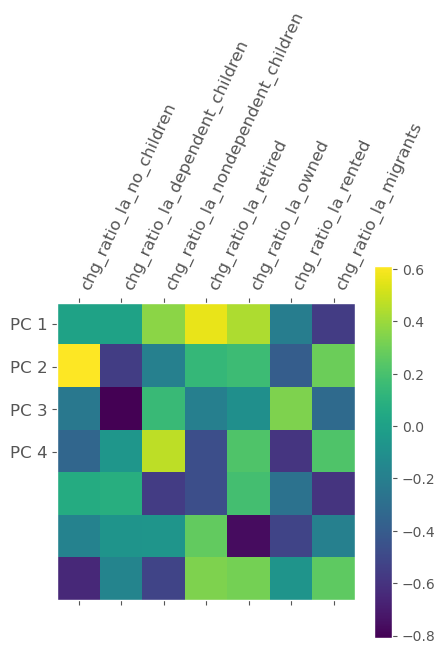

In [66]:
# visualise the constituents of each PC using heatmap

features = ["chg_ratio_la_no_children", "chg_ratio_la_dependent_children", "chg_ratio_la_nondependent_children", "chg_ratio_la_retired","chg_ratio_la_owned","chg_ratio_la_rented ","chg_ratio_la_migrants"]
plt.style.use('ggplot')
plt.matshow(pca_all.components_,cmap='viridis')
plt.yticks([0,1,2,3],['PC 1','PC 2','PC 3', 'PC 4'],fontsize=12)
plt.colorbar()
plt.xticks(range(len(features)),features,rotation=65,ha='left',fontsize=12)
plt.grid(b=None, which = "major")

plt.tight_layout()
plt.show()


#plt.savefig('PCA_heatmap.png', dpi = 300, bbox_inches = "tight")

In [67]:
PCA_asc = pd.DataFrame(PCA_scores)
PCA_asc = PCA_asc.rename(columns={0: "PCA_asc"})
asc_cluster_score = asc_cluster.reset_index()
asc_cluster_score["PCA_asc"] = PCA_asc[:]


In [68]:
asc_cluster_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   MSOA11CD                            177 non-null    object 
 1   chg_ratio_la_no_children            177 non-null    float64
 2   chg_ratio_la_dependent_children     177 non-null    float64
 3   chg_ratio_la_nondependent_children  177 non-null    float64
 4   chg_ratio_la_retired                177 non-null    float64
 5   chg_ratio_la_owned                  177 non-null    float64
 6   chg_ratio_la_rented                 177 non-null    float64
 7   chg_ratio_la_migrants               177 non-null    float64
 8   PCA_asc                             177 non-null    float64
dtypes: float64(8), object(1)
memory usage: 12.6+ KB


In [69]:
cor2=swandlondon_core.iloc[:,[0,1,2,3,4,5,6,7,25,26]].copy()
cor2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1211 entries, 0 to 1210
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   MSOA11CD                    1211 non-null   object 
 1   MSOA11NM                    1211 non-null   object 
 2   LAD11CD                     1211 non-null   object 
 3   LAD11NM                     1211 non-null   object 
 4   RGN11CD                     1211 non-null   object 
 5   RGN11NM                     1211 non-null   object 
 6   MSOA01CD                    1211 non-null   object 
 7   MSOA01NM                    1211 non-null   object 
 8   ratio_la_space_vacant_2001  1211 non-null   float64
 9   ratio_la_space_vacant_2011  1211 non-null   float64
dtypes: float64(2), object(8)
memory usage: 94.7+ KB


In [70]:
cor = asc_cluster_score.merge(cor2, on='MSOA11CD', how='left')

In [71]:
cor['ratio_space_vacant_chg'] = (cor['ratio_la_space_vacant_2011'] - cor['ratio_la_space_vacant_2001'])

In [72]:
cluster_gen_clean=cluster_gen.iloc[:,[0,9]].copy()
cluster_gen_clean = cluster_gen_clean.merge(cor, on='MSOA11CD', how='left')
cluster_gen_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 0 to 96
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   MSOA11CD                            97 non-null     object 
 1   asc_cluster_yeoJohnson_minmax_cat   97 non-null     object 
 2   chg_ratio_la_no_children            97 non-null     float64
 3   chg_ratio_la_dependent_children     97 non-null     float64
 4   chg_ratio_la_nondependent_children  97 non-null     float64
 5   chg_ratio_la_retired                97 non-null     float64
 6   chg_ratio_la_owned                  97 non-null     float64
 7   chg_ratio_la_rented                 97 non-null     float64
 8   chg_ratio_la_migrants               97 non-null     float64
 9   PCA_asc                             97 non-null     float64
 10  MSOA11NM                            97 non-null     object 
 11  LAD11CD                             97 non-null

In [73]:
cluster_iup_clean=cluster_iup.iloc[:,[0,9]].copy()
cluster_iup_clean = cluster_iup_clean.merge(cor, on='MSOA11CD', how='left')
cluster_iup_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 0 to 79
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   MSOA11CD                            80 non-null     object 
 1   asc_cluster_yeoJohnson_minmax_cat   80 non-null     object 
 2   chg_ratio_la_no_children            80 non-null     float64
 3   chg_ratio_la_dependent_children     80 non-null     float64
 4   chg_ratio_la_nondependent_children  80 non-null     float64
 5   chg_ratio_la_retired                80 non-null     float64
 6   chg_ratio_la_owned                  80 non-null     float64
 7   chg_ratio_la_rented                 80 non-null     float64
 8   chg_ratio_la_migrants               80 non-null     float64
 9   PCA_asc                             80 non-null     float64
 10  MSOA11NM                            80 non-null     object 
 11  LAD11CD                             80 non-null

<AxesSubplot:xlabel='ratio_space_vacant_chg', ylabel='PCA_asc'>

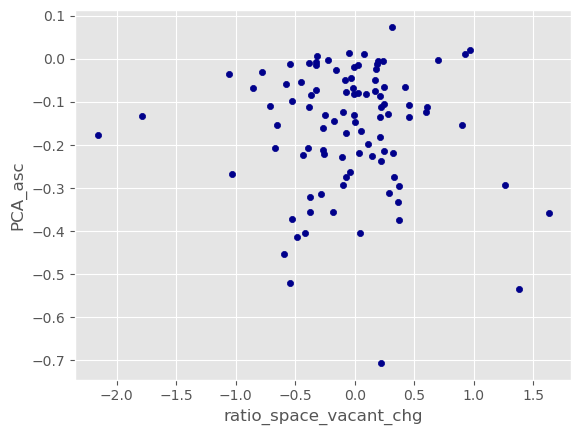

In [74]:
cluster_gen_clean.plot.scatter(x='ratio_space_vacant_chg',y='PCA_asc', c='DarkBlue')

<AxesSubplot:xlabel='ratio_space_vacant_chg', ylabel='PCA_asc'>

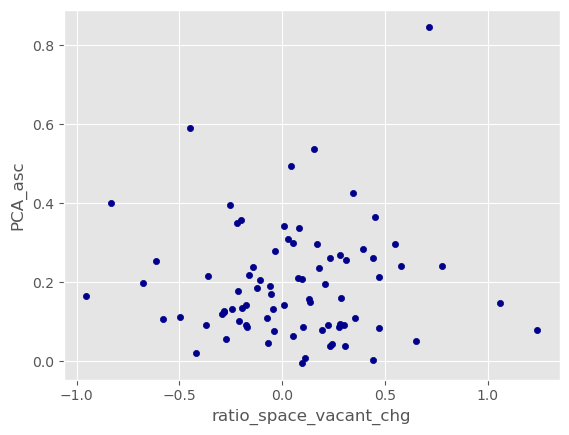

In [75]:
cluster_iup_clean.plot.scatter(x='ratio_space_vacant_chg',y='PCA_asc', c='DarkBlue')

In [76]:
from scipy import stats

In [77]:
#for gentrifying MSOAs
#calculate Spearman Rank correlation and corresponding p-value

rho, p = stats.spearmanr(cluster_gen_clean['PCA_asc'], cluster_gen_clean['ratio_space_vacant_chg'])
print(rho)
print(p)

0.023879654954765406
0.8164047854509068


In [78]:
#for incumbent upgrading MSOAs
#calculate Spearman Rank correlation and corresponding p-value

rho, p = stats.spearmanr(cluster_iup_clean['PCA_asc'], cluster_iup_clean['ratio_space_vacant_chg'])
print(rho)
print(p)

-0.010126582278481013
0.9289613856582667
